#### Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

#### Selección de imagen desde archivo y conversión a escala de grises

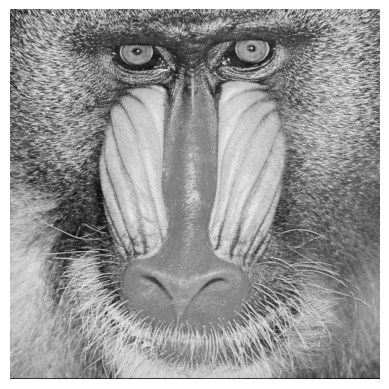

In [3]:
# Lee imagen de archivo
img = cv2.imread('Images/mandril.jpg') 

# Conversión de la imagen a escala de grises desde BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Muestra la imagen
plt.figure()
plt.axis("off")
plt.imshow(gris, cmap="gray")
plt.show()

#### Operador Canny - Detector de bordes multietapa

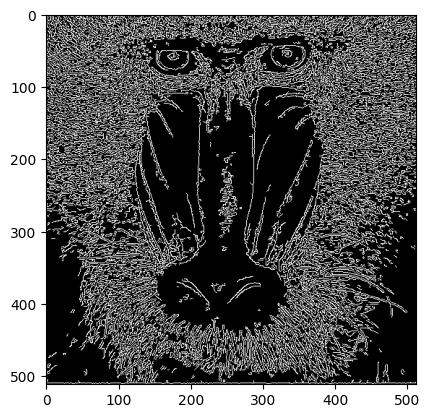

In [4]:
# Aplicación de Canny a la imagen gris para obtener contornos
# Como resultado se obtiene una salida binaria (0 o 255)
canny = cv2.Canny(gris, 100, 200)

# Muestra la imagen
plt.imshow(canny, cmap="gray")
plt.show()

#### Número de píxeles no nulos por columnas

(0.0, 512.0)

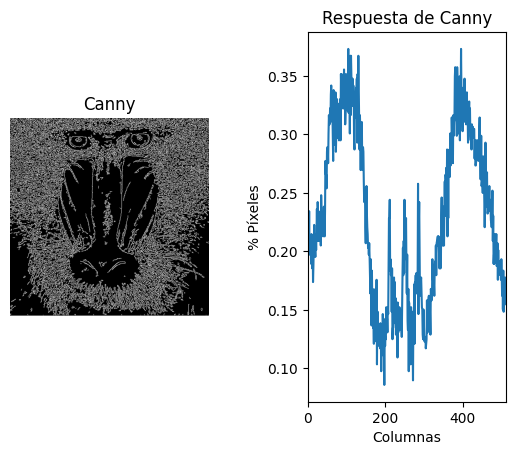

In [13]:
# El contenido de la imagen Canny son valores 0 o 255
# Contamos el número de píxeles blancos (255) por columna
# Suma los valores de los píxeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de filas y al valor máximo del píxel (255)
cols = cols = col_counts[0] / (255 * canny.shape[0])

# Mostramos las gráficas resultantes
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

# Hacer espacio entre las gráficas
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% Píxeles")
plt.plot(cols)
plt.xlim([0, canny.shape[1]])

#### Número de píxeles no nulos por filas

(0.0, 512.0)

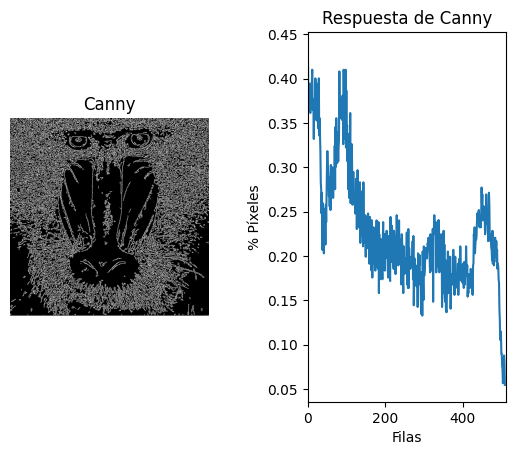

In [14]:
# Contamos el número de píxeles blancos (255) por fila
# Suma los valores de los píxeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de columnas y al valor máximo del píxel (255)
rows = row_counts[:510,0] / (255 * canny.shape[1])

# Mostramos las gráficas resultantes
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

# Hacer espacio entre las gráficas
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% Píxeles")
plt.plot(rows)
plt.xlim([0, canny.shape[0]])

#### Máximo porcentaje de píxeles blancos para filas y columnas

In [25]:
# Valor máximo alcanzado en las columnas
max_col_val = np.max(cols)

# Posición del valor máximo en las columnas
max_col_pos = np.argmax(cols)

# Valor máximo alcanzado en las filas
max_row_val = np.max(rows)

# Posición del valor máximo en las filas
max_row_pos = np.argmax(rows)

# Mostramos los resultados por pantalla
print("--------------------------------------------------------------")
print("[+] El valor máximo alcanzado en las columnas es: {}".format(max_col_val))
print("[+] La posición del valor máximo en las columnas es: {}\n".format(max_col_pos))

print("[-] El valor máximo alcanzado en las filas es: {}".format(max_row_val))
print("[-] La posición del valor máximo en las filas es: {}".format(max_row_pos))
print("--------------------------------------------------------------")

--------------------------------------------------------------
[+] El valor máximo alcanzado en las columnas es: 0.373046875
[+] La posición del valor máximo en las columnas es: 105

[-] El valor máximo alcanzado en las filas es: 0.43359375
[-] La posición del valor máximo en las filas es: 0
--------------------------------------------------------------


#### Número de valores que superan en cada caso el (0.95 * Máximo)

In [38]:
# Número de valores que superan el 0.95 * Máximo en las columnas
num_cols = np.sum(cols > 0.95 * max_col_val)

# Valores que superan el 0.95 * Máximo en las columnas
cols_95 = cols[cols > 0.95 * max_col_val]

# Número de valores que superan el 0.95 * Máximo en las filas
num_rows = np.sum(rows > 0.95 * max_row_val)

# Valores que superan el 0.95 * Máximo en las filas
rows_95 = rows[rows > 0.95 * max_row_val]

# Mostramos los resultados por pantalla
print("------------------------------------------------------------------------")
print("[+] Número de valores que superan el (0.95 * Máximo) en las columnas: {}\n".format(num_cols))
#print("[+] Valores que superan el (0.95 * Máximo) en las columnas: {}\n".format(cols_95))

print("[-] Número de valores que superan el (0.95 * Máximo) en las filas: {}".format(num_rows))
#print("[-] Valores que superan el (0.95 * Máximo) en las filas: {}".format(rows_95))
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
[+] Número de valores que superan el (0.95 * Máximo) en las columnas: 8

[-] Número de valores que superan el (0.95 * Máximo) en las filas: 2
------------------------------------------------------------------------
